🔧 Configuring GPU for TensorFlow...
⚠️  No GPU found. Using CPU for training.
💡 To use GPU: Ensure CUDA-compatible GPU and TensorFlow-GPU are installed
🎯 TensorFlow is using: [LogicalDevice(name='/device:CPU:0', device_type='CPU')]
✅ XLA JIT compilation enabled for performance optimization
🏥 Hemodialysis GRU-Based Monitoring System
Dataset Shape: (5000, 27)
Columns: ['Age', 'Gender', 'Weight', 'Diabetes', 'Hypertension', 'Kidney Failure Cause', 'Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure', 'Heart Rate', 'Creatinine', 'Urea', 'Potassium', 'Hemoglobin', 'Hematocrit', 'Albumin', 'Dialysis Duration (hours)', 'Dialysis Frequency (per week)', 'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type', 'Kt/V', 'URR', 'Urine Output (ml/day)', 'Dry Weight (kg)', 'Fluid Removal Rate (ml/hour)', 'Disease Severity']

First few rows:
   Age  Gender  Weight  Diabetes  Hypertension Kidney Failure Cause  \
0   62  Female    97.4      True       

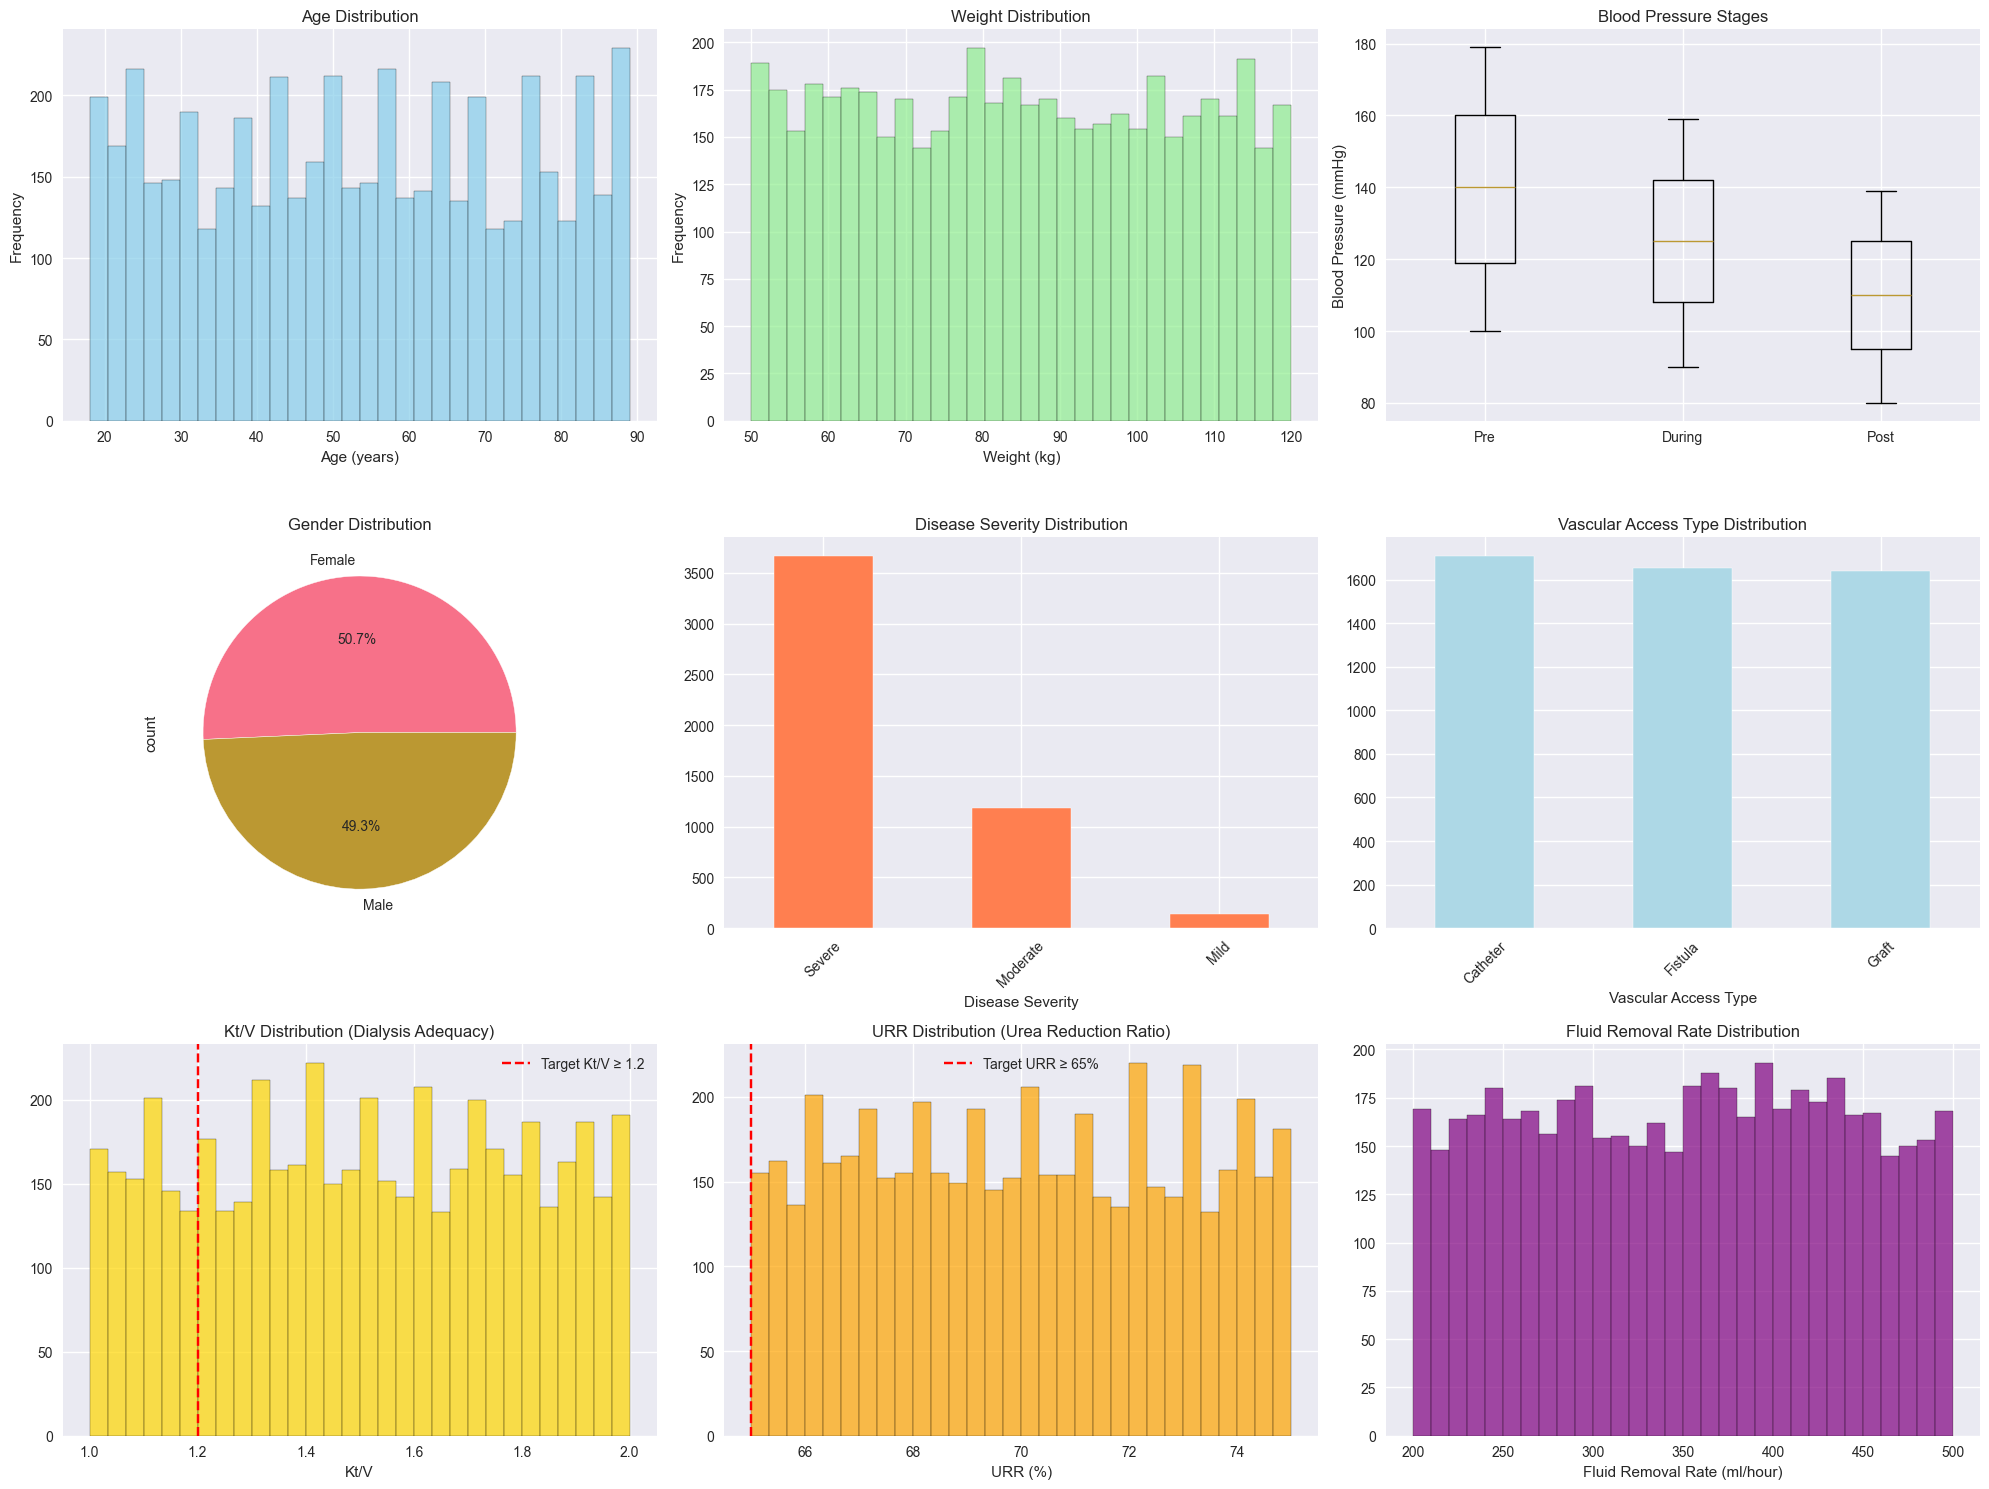


CLINICAL RISK ASSESSMENT & FEATURE ENGINEERING
Creating advanced clinical features...

Target Variable Distribution:
stability_class
Unstable    3026
Stable      1974
Name: count, dtype: int64
Unstable sessions: 3026 (60.5%)

CORRELATION ANALYSIS & FEATURE RELATIONSHIPS


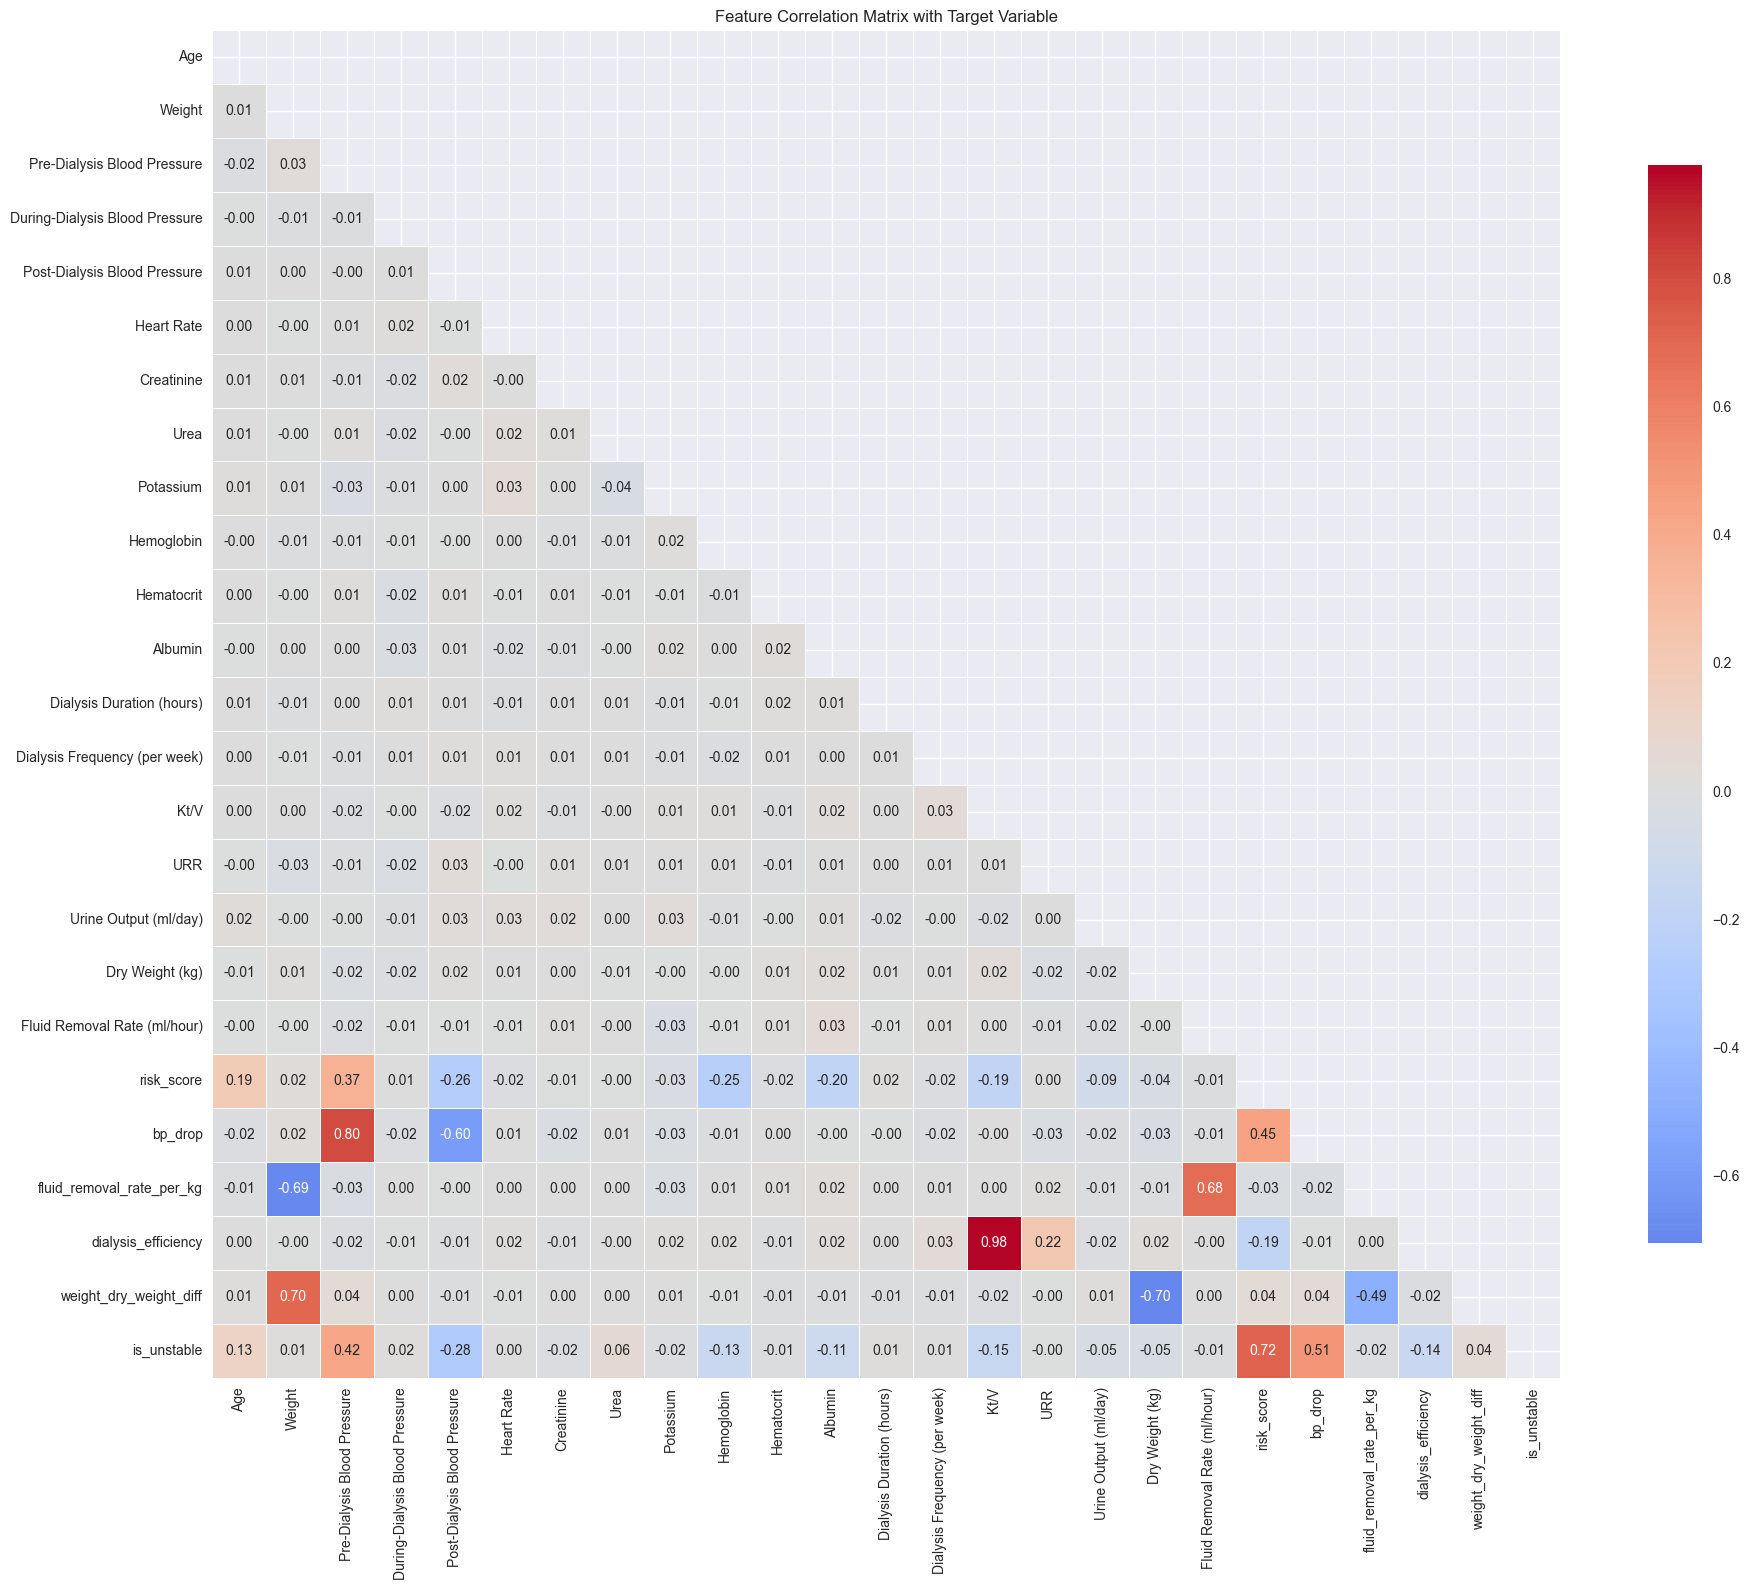


Top 15 features correlated with instability:
is_unstable                     1.000000
risk_score                      0.717597
bp_drop                         0.506253
Pre-Dialysis Blood Pressure     0.419602
Post-Dialysis Blood Pressure    0.284299
Kt/V                            0.147748
dialysis_efficiency             0.144767
Hemoglobin                      0.132879
Age                             0.126213
Albumin                         0.107399
Urea                            0.061495
Dry Weight (kg)                 0.047699
Urine Output (ml/day)           0.045822
weight_dry_weight_diff          0.043806
Potassium                       0.019306
Name: is_unstable, dtype: float64


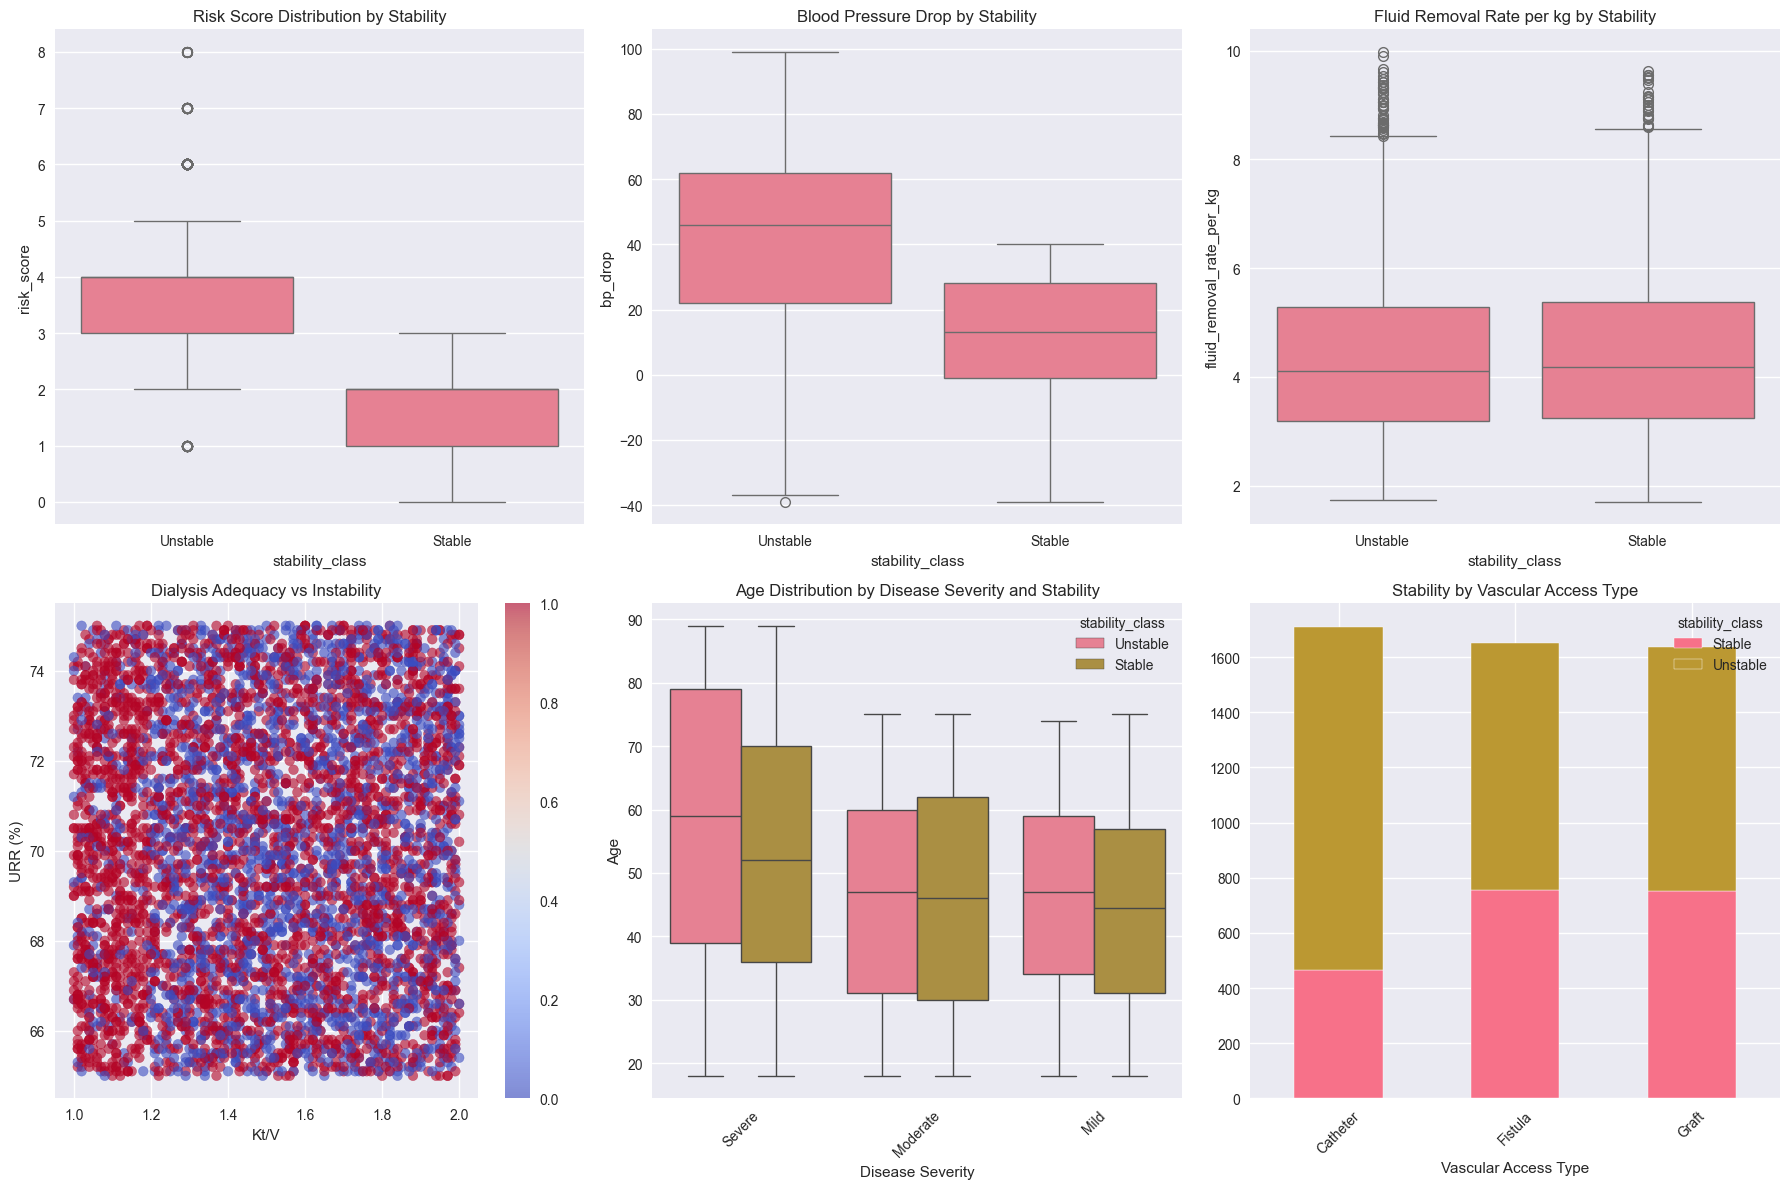


ADVANCED FEATURE SELECTION & EXTRACTION
Total features available: 31
Dataset shape: (5000, 31)
Target distribution: [1974 3026]

1. Statistical Feature Selection (SelectKBest)...
Selected features (statistical): 15

2. Random Forest Feature Selection...
Selected features (Random Forest): 15

Final feature set size: 16
Final features: ['dialysis_efficiency', 'Albumin', 'Post-Dialysis Blood Pressure', 'Kt/V', 'Hypertension_encoded', 'Age', 'Urea', 'Hemoglobin', 'Pre-Dialysis Blood Pressure', 'bp_drop', 'Diabetes_encoded', 'Vascular Access Type_encoded', 'Urine Output (ml/day)', 'risk_score', 'Dry Weight (kg)', 'Fluid Removal Rate (ml/hour)']


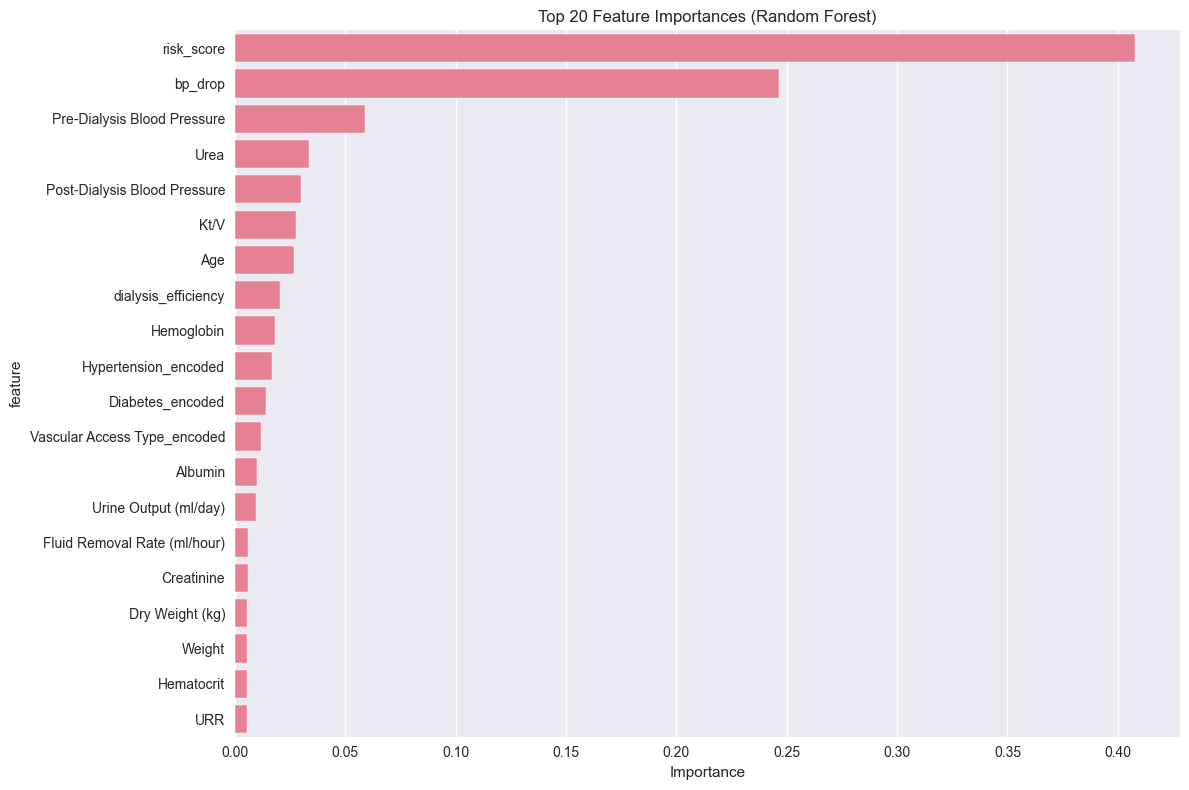


DIMENSIONALITY REDUCTION & VISUALIZATION
Performing PCA analysis...
Performing t-SNE analysis...


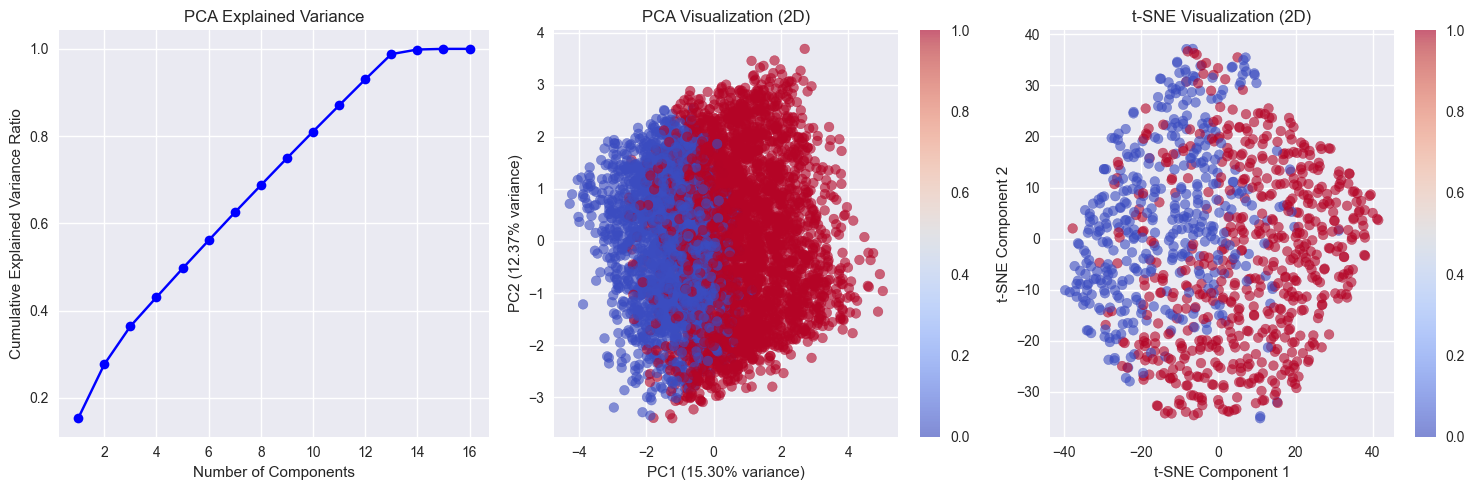


DATA PREPROCESSING FOR GRU MODEL
Training set shape: (4000, 16)
Test set shape: (1000, 16)
Training target distribution: [1579 2421]
Test target distribution: [395 605]
Creating enhanced temporal sequences for GRU...
Creating temporal sequences with length 12...
Sequence shape: (1497, 12, 16)
Sequence target shape: (1497,)
Sequence target distribution: [551 946]
Training sequences: (1197, 12, 16)
Validation sequences: (300, 12, 16)

TRAINING ENHANCED GRU MODEL
Input shape for GRU: (12, 16)

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 12, 128)        │        56,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 12, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,609 (424.25 KB)

 Trainable params: 108,033 (422.00 KB)

 Non-trainable params: 576 (2.25 KB)

Class weights: {0: 1.0, 1: 0.5833333333333334}

Training Enhanced GRU Model on GPU...
📊 Training dataset: 1197 samples
📊 Validation dataset: 300 samples
🎯 Batch size optimized for GPU: 32
🔄 Epoch 0: Training on GPU...
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 0.6258 - accuracy: 0.6152 - loss: 0.8274 - precision: 0.7252 - recall: 0.6632 - val_AUC: 0.8830 - val_accuracy: 0.8033 - val_loss: 0.9624 - val_precision: 0.8970 - val_recall: 0.7789 - learning_rate: 0.0010
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.7895 - accuracy: 0.7393 - loss: 0.7404 - precision: 0.8244 - recall: 0.7531 - val_AUC: 0.8925 - val_accuracy: 0.8033 - val_loss: 0.8265 - val_precision: 0.8830 - val_recall: 0.7947 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.8044 - accuracy: 0.7270 - loss: 0.7032 - precision: 0.8420 - recall: 0.7276 - val_AUC: 0.8981 - val_accuracy: 0.8067 - val_loss: 0.7707 - val_precision: 0.8929 - val_recall: 0.7895 - learnin

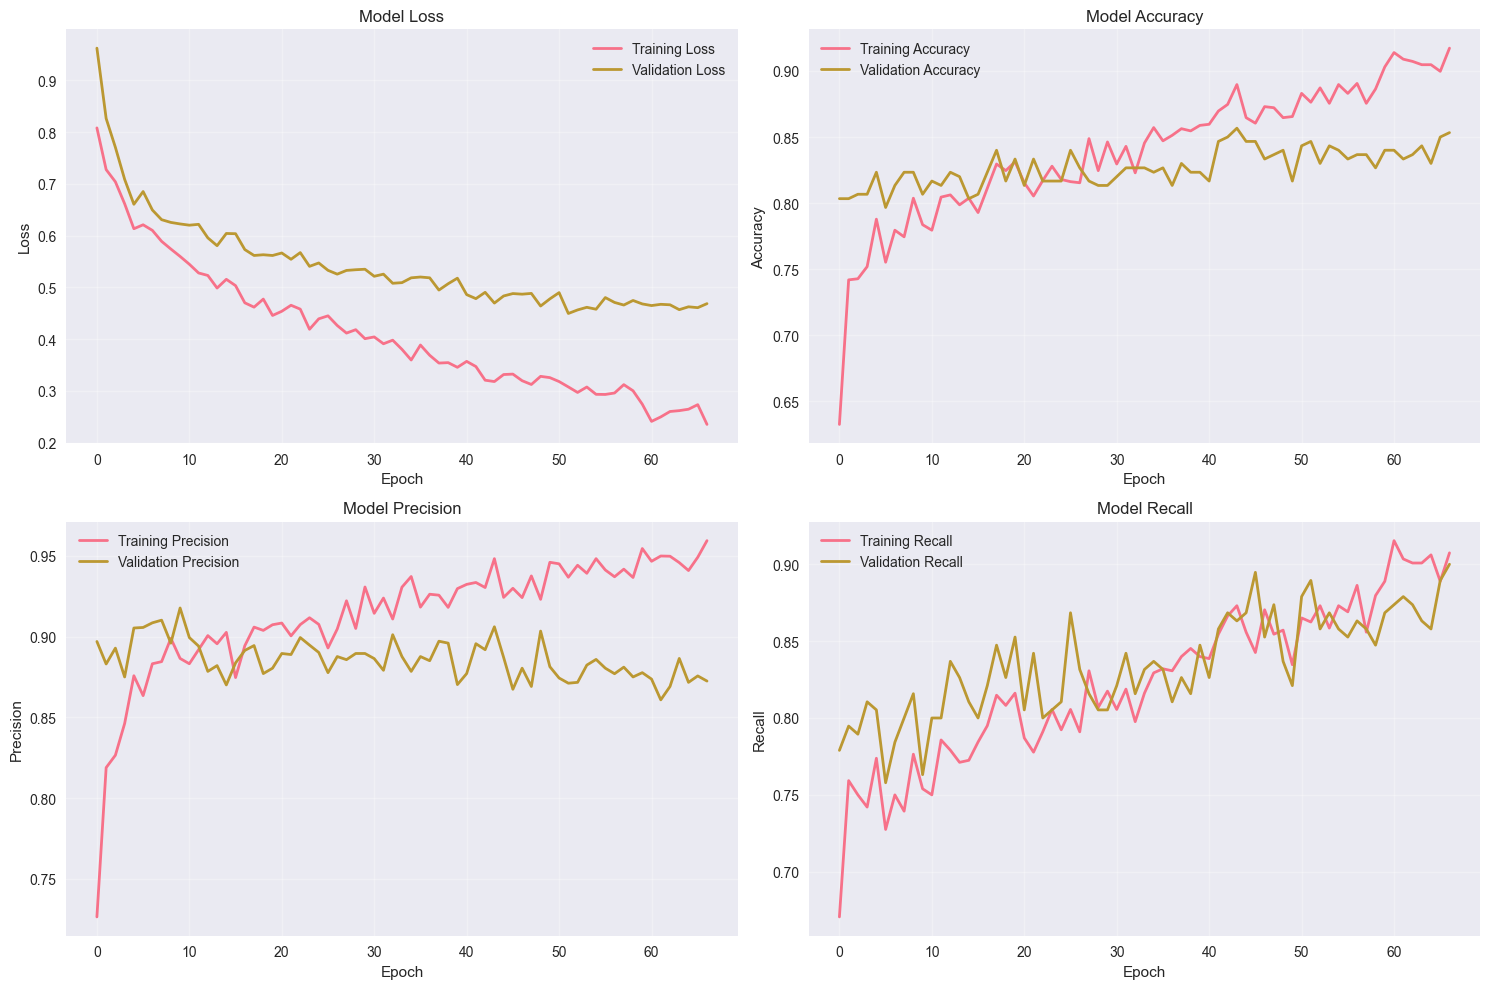

🔮 Making predictions on GPU...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step

GRU Model Performance:
Accuracy: 0.8467
AUC Score: 0.9169

Detailed Classification Report:
              precision    recall  f1-score   support

      Stable       0.80      0.77      0.79       110
    Unstable       0.87      0.89      0.88       190

    accuracy                           0.85       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.85      0.85      0.85       300


ADVANCED MODEL VISUALIZATIONS
Calculating feature importance for GRU model...
🔍 Calculating feature importance on GPU...
   Processed 1/16 features...
   Processed 6/16 features...
   Processed 11/16 features...
   Processed 16/16 features...


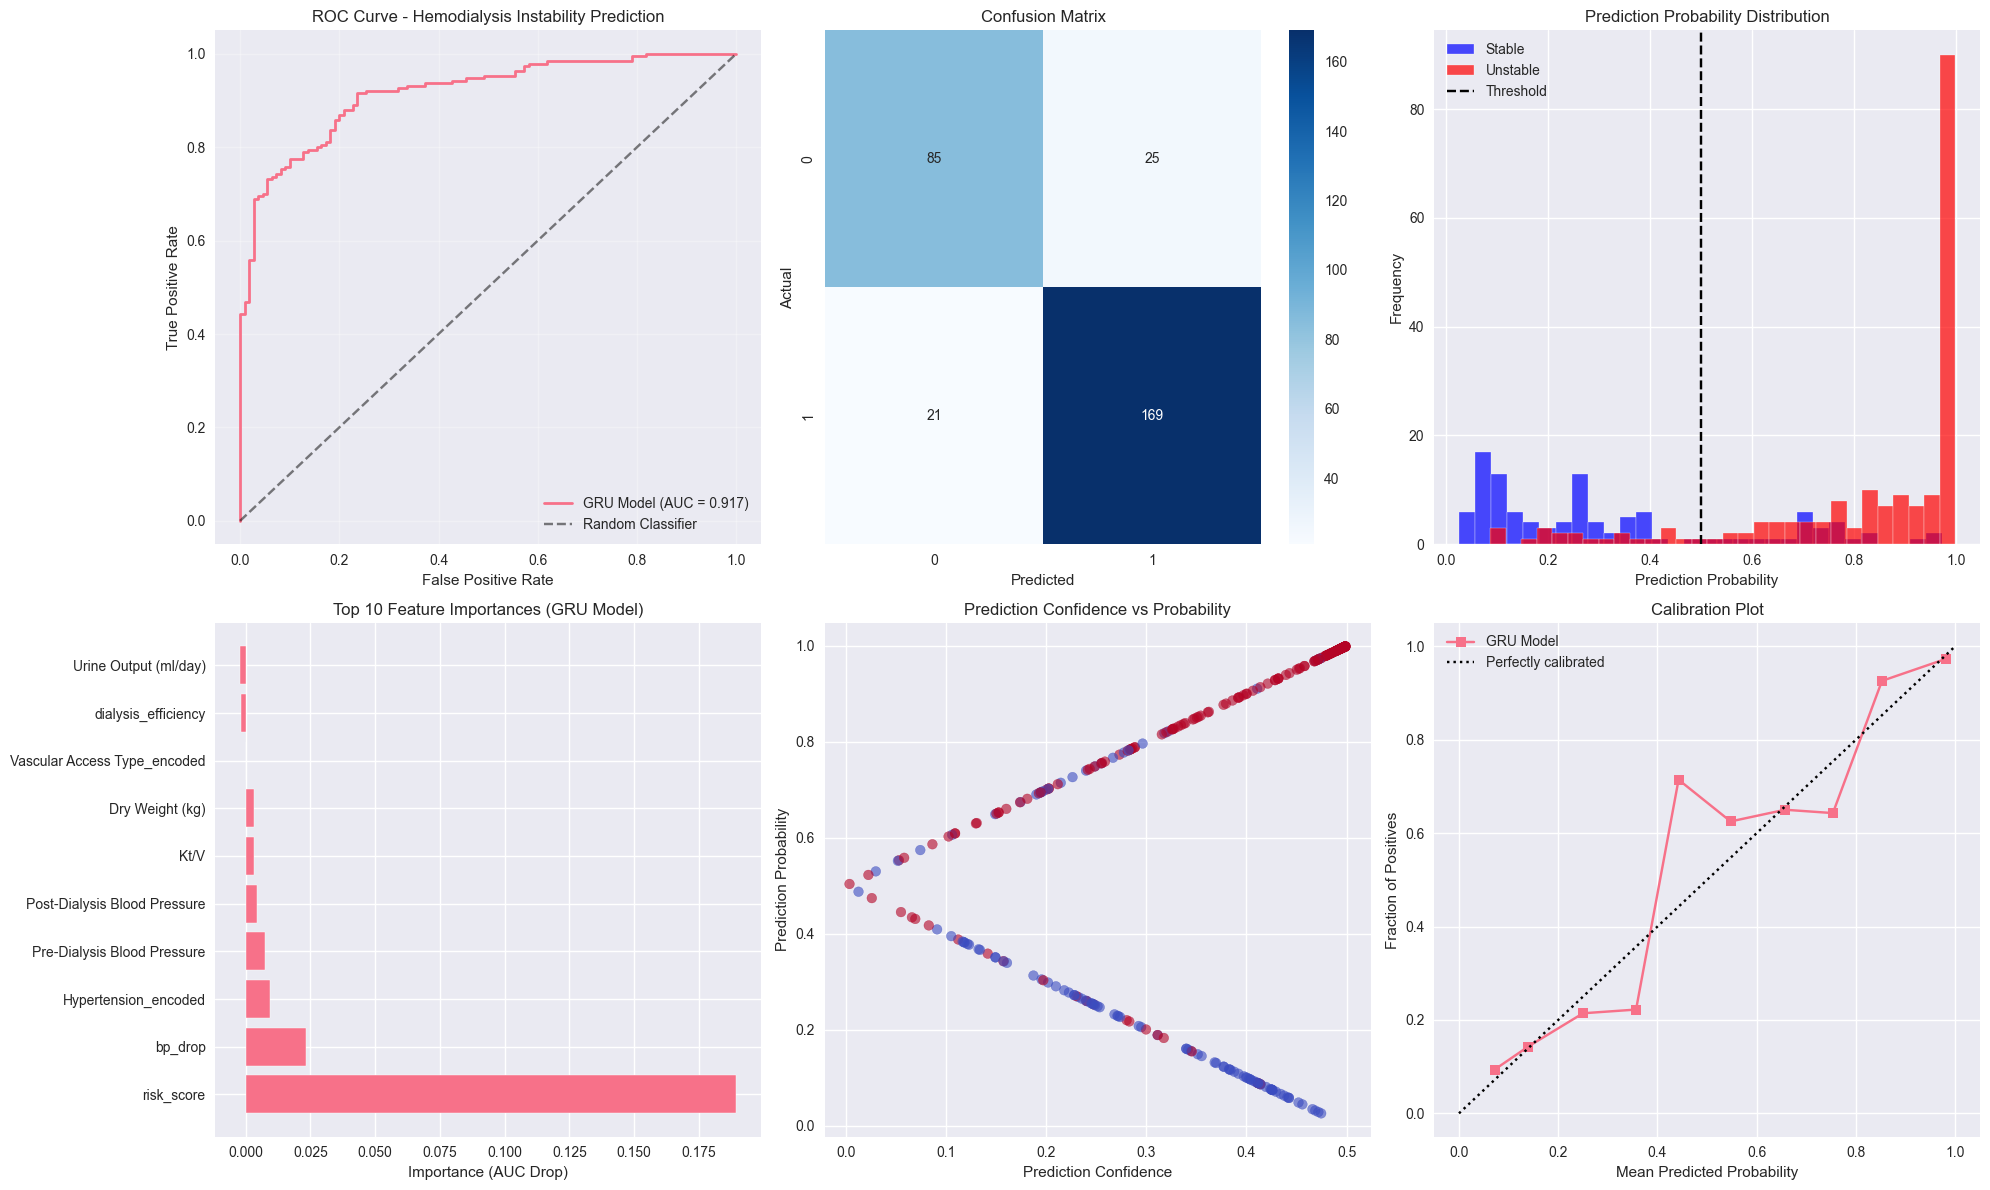


REAL-TIME MONITORING SIMULATION

Alerts for Patient 3:
Time 7: 🚨 CRITICAL: Immediate intervention required
Time 8: 🚨 CRITICAL: Immediate intervention required
Time 9: 🚨 CRITICAL: Immediate intervention required
Time 10: 🚨 CRITICAL: Immediate intervention required
Time 11: 🚨 CRITICAL: Immediate intervention required


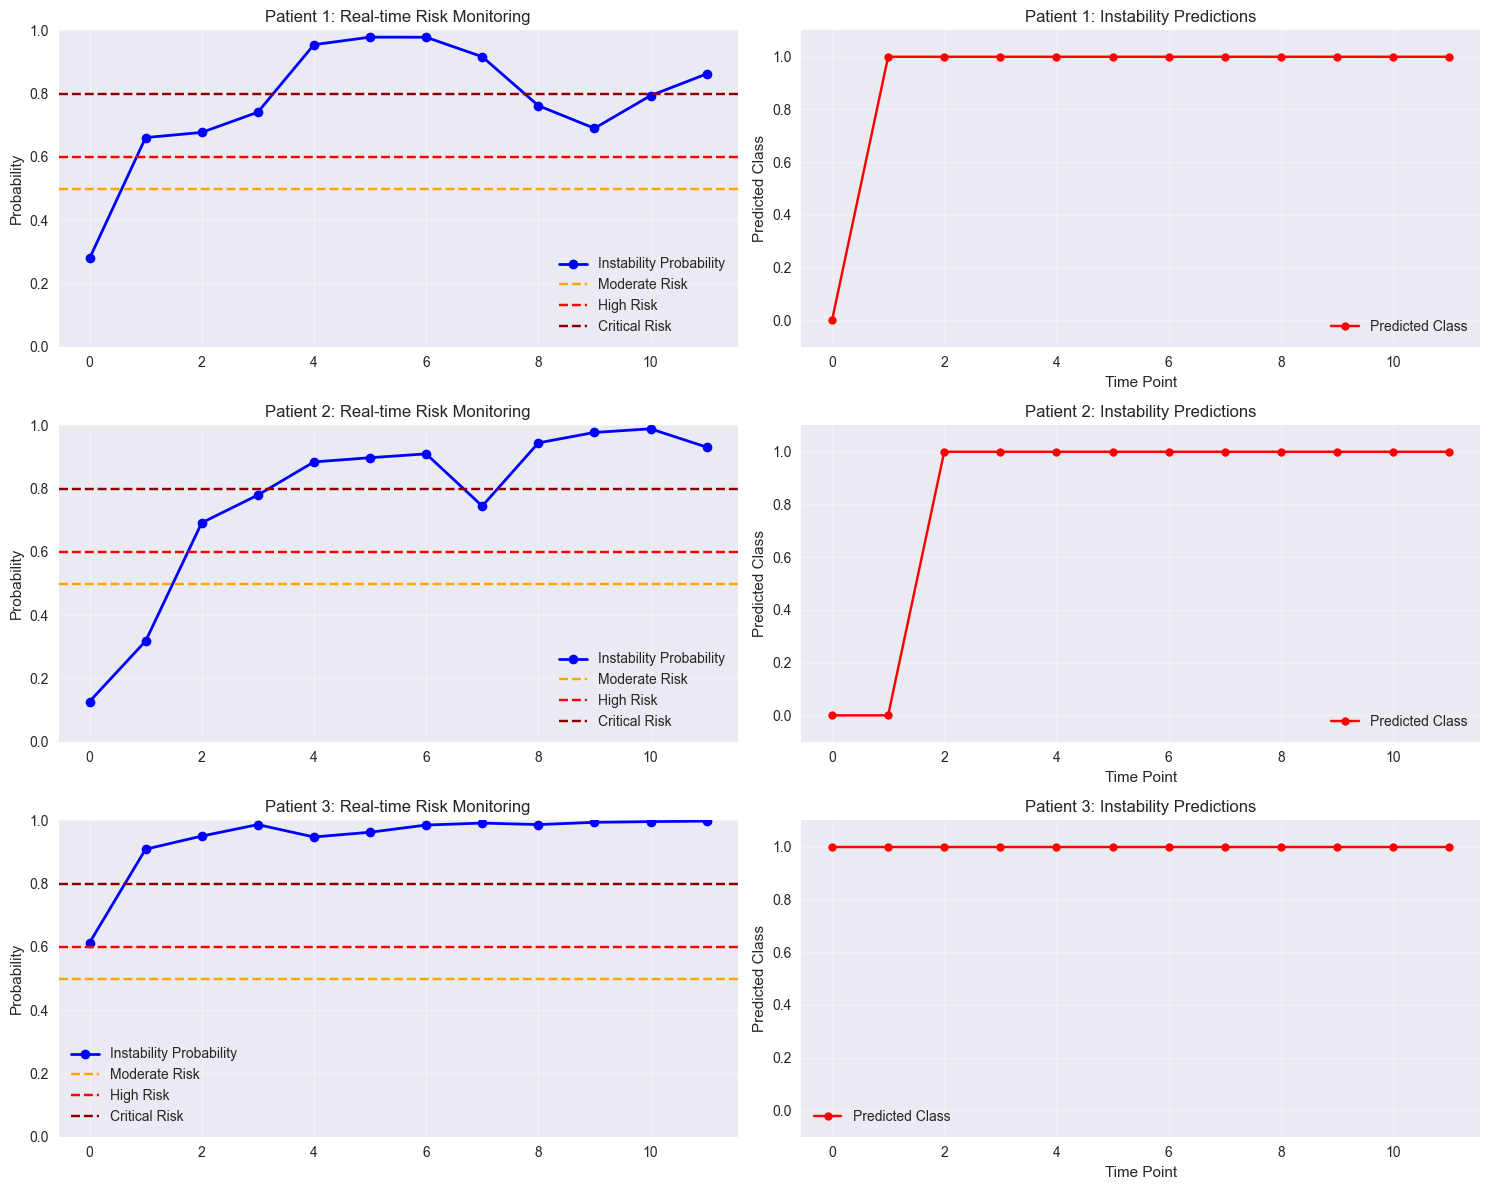


CLINICAL DECISION SUPPORT DEMO - USING FIRST 10 TEST SAMPLES
Extracting first 10 samples from test data...
Created 20 test patient records from test data
Test patients include 12 unstable cases

TEST PATIENT ASSESSMENT - Patient 1
Actual Stability: Stable
Predicted Risk Probability: 0.052
Predicted Risk Level: LOW
Key Clinical Values:
  Age: 49 years
  BP Drop: 21 mmHg
  Fluid Rate: 6.4 ml/kg/hr
  Kt/V: 1.56
  Hemoglobin: 11.4 g/dL
  Vascular Access: Graft
Risk Factors Analysis: {'bp_drop': 21.0, 'bp_risk': 'Low', 'fluid_rate_per_kg': 6.430656934306569, 'fluid_risk': 'Low', 'ktv': 1.56, 'adequacy_risk': 'Low', 'anemia_risk': 'Low'}
Clinical Recommendations:
  ✅ Continue routine monitoring
Prediction Accuracy: ✅ CORRECT

TEST PATIENT ASSESSMENT - Patient 2
Actual Stability: Stable
Predicted Risk Probability: 0.022
Predicted Risk Level: LOW
Key Clinical Values:
  Age: 67 years
  BP Drop: -15 mmHg
  Fluid Rate: 3.4 ml/kg/hr
  Kt/V: 1.75
  Hemoglobin: 14.0 g/dL
  Vascular Access: Fistula


In [1]:
# Deep Temporal Monitoring of Hemodialysis Sessions Using GRU-Based Analysis
# Author: AI Assistant
# Date: June 2025

# ==============================================================================
# IMPORT LIBRARIES
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# GPU CONFIGURATION
# ==============================================================================

print("🔧 Configuring GPU for TensorFlow...")

# Check GPU availability
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f"✅ Found {len(gpus)} GPU(s): {[gpu.name for gpu in gpus]}")
    try:
        # Enable memory growth for GPU (prevents TensorFlow from allocating all GPU memory)
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        # Set GPU as preferred device
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        
        # Enable mixed precision for better performance on modern GPUs
        policy = tf.keras.mixed_precision.Policy('mixed_float16')
        tf.keras.mixed_precision.set_global_policy(policy)
        print("✅ Mixed precision enabled for faster training")
        
        print(f"✅ GPU configured successfully. Using: {gpus[0].name}")
        
    except RuntimeError as e:
        print(f"⚠️  GPU configuration error: {e}")
        print("🔄 Falling back to CPU")
else:
    print("⚠️  No GPU found. Using CPU for training.")
    print("💡 To use GPU: Ensure CUDA-compatible GPU and TensorFlow-GPU are installed")

# Verify device placement
print(f"🎯 TensorFlow is using: {tf.config.list_logical_devices()}")

# Configure TensorFlow for optimal performance
tf.config.optimizer.set_jit(True)  # Enable XLA JIT compilation
print("✅ XLA JIT compilation enabled for performance optimization")

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🏥 Hemodialysis GRU-Based Monitoring System")
print("=" * 50)

# ==============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# ==============================================================================

# Load the dataset
df = pd.read_csv('Hemodialysis_Data 2.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() > 0:
    print("Handling missing values...")
    # Forward fill for numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(method='ffill').fillna(method='bfill')
    
    # Mode fill for categorical columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

# ==============================================================================
# 2. COMPREHENSIVE DATASET ANALYSIS
# ==============================================================================

print("\n" + "="*60)
print("COMPREHENSIVE DATASET ANALYSIS")
print("="*60)

# Basic statistics
print("\nDataset Statistics:")
print(df.describe())

# Dataset distribution analysis
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

# Age distribution
axes[0].hist(df['Age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')

# Weight distribution
axes[1].hist(df['Weight'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Weight Distribution')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Frequency')

# Blood pressure analysis
bp_cols = ['Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure']
bp_data = df[bp_cols]
axes[2].boxplot(bp_data.values, labels=['Pre', 'During', 'Post'])
axes[2].set_title('Blood Pressure Stages')
axes[2].set_ylabel('Blood Pressure (mmHg)')

# Gender distribution
df['Gender'].value_counts().plot(kind='pie', ax=axes[3], autopct='%1.1f%%')
axes[3].set_title('Gender Distribution')

# Disease severity distribution
df['Disease Severity'].value_counts().plot(kind='bar', ax=axes[4], color='coral')
axes[4].set_title('Disease Severity Distribution')
axes[4].tick_params(axis='x', rotation=45)

# Vascular access type
df['Vascular Access Type'].value_counts().plot(kind='bar', ax=axes[5], color='lightblue')
axes[5].set_title('Vascular Access Type Distribution')
axes[5].tick_params(axis='x', rotation=45)

# Kt/V distribution (dialysis adequacy)
axes[6].hist(df['Kt/V'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[6].axvline(1.2, color='red', linestyle='--', label='Target Kt/V ≥ 1.2')
axes[6].set_title('Kt/V Distribution (Dialysis Adequacy)')
axes[6].set_xlabel('Kt/V')
axes[6].legend()

# URR distribution
axes[7].hist(df['URR'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[7].axvline(65, color='red', linestyle='--', label='Target URR ≥ 65%')
axes[7].set_title('URR Distribution (Urea Reduction Ratio)')
axes[7].set_xlabel('URR (%)')
axes[7].legend()

# Fluid removal rate
axes[8].hist(df['Fluid Removal Rate (ml/hour)'], bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[8].set_title('Fluid Removal Rate Distribution')
axes[8].set_xlabel('Fluid Removal Rate (ml/hour)')

plt.tight_layout()
plt.show()

# ==============================================================================
# 3. CLINICAL RISK ASSESSMENT AND FEATURE ENGINEERING
# ==============================================================================

print("\n" + "="*60)
print("CLINICAL RISK ASSESSMENT & FEATURE ENGINEERING")
print("="*60)

def calculate_advanced_risk_factors(row):
    """Calculate comprehensive risk factors for hemodialysis complications"""
    risks = {
        'hypotension_risk': (row['Pre-Dialysis Blood Pressure'] - row['Post-Dialysis Blood Pressure']) > 40,
        'severe_hypotension': (row['Pre-Dialysis Blood Pressure'] - row['Post-Dialysis Blood Pressure']) > 60,
        'high_fluid_removal': (row['Fluid Removal Rate (ml/hour)'] / row['Weight']) > 13,
        'very_high_fluid_removal': (row['Fluid Removal Rate (ml/hour)'] / row['Weight']) > 18,
        'poor_ktv': row['Kt/V'] < 1.2,
        'very_poor_ktv': row['Kt/V'] < 1.0,
        'poor_urr': row['URR'] < 65,
        'very_poor_urr': row['URR'] < 55,
        'hyperkalemia': row['Potassium'] > 5.5,
        'severe_hyperkalemia': row['Potassium'] > 6.0,
        'hypokalemia': row['Potassium'] < 3.5,
        'anemia': row['Hemoglobin'] < 10,
        'severe_anemia': row['Hemoglobin'] < 8,
        'low_albumin': row['Albumin'] < 3.5,
        'very_low_albumin': row['Albumin'] < 3.0,
        'catheter_access': row['Vascular Access Type'] == 'Catheter',
        'elderly_patient': row['Age'] > 75,
        'diabetes_comorbidity': row['Diabetes'] == True,
        'hypertension_comorbidity': row['Hypertension'] == True,
        'low_urine_output': row['Urine Output (ml/day)'] < 100
    }
    return sum(risks.values())

# Advanced feature engineering
print("Creating advanced clinical features...")

# Calculate risk scores and derived features
df['risk_score'] = df.apply(calculate_advanced_risk_factors, axis=1)
df['bp_drop'] = df['Pre-Dialysis Blood Pressure'] - df['Post-Dialysis Blood Pressure']
df['bp_change_during'] = df['During-Dialysis Blood Pressure'] - df['Pre-Dialysis Blood Pressure']
df['bp_recovery'] = df['Post-Dialysis Blood Pressure'] - df['During-Dialysis Blood Pressure']
df['fluid_removal_rate_per_kg'] = df['Fluid Removal Rate (ml/hour)'] / df['Weight']
df['dialysis_efficiency'] = df['Kt/V'] * df['URR'] / 100
df['hemoglobin_hematocrit_ratio'] = df['Hemoglobin'] / df['Hematocrit']
df['creatinine_urea_ratio'] = df['Creatinine'] / df['Urea']
df['weight_dry_weight_diff'] = df['Weight'] - df['Dry Weight (kg)']
df['fluid_gain_percentage'] = (df['Weight'] - df['Dry Weight (kg)']) / df['Dry Weight (kg)'] * 100

# Age categories
df['age_category'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle', 'Senior', 'Elderly'])

# BMI calculation (assuming height is not available, using weight categories)
df['weight_category'] = pd.cut(df['Weight'], bins=[0, 60, 80, 100, 200], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create target variable for instability prediction
def determine_instability_advanced(row):
    """Advanced instability determination based on multiple clinical criteria"""
    critical_conditions = (
        row['risk_score'] >= 6 or
        row['bp_drop'] > 60 or
        row['fluid_removal_rate_per_kg'] > 18 or
        (row['Disease Severity'] == 'Severe' and row['risk_score'] >= 4) or
        (row['Kt/V'] < 1.0 and row['URR'] < 55) or
        (row['Hemoglobin'] < 8 and row['Albumin'] < 3.0)
    )
    
    moderate_conditions = (
        row['risk_score'] >= 4 or
        row['bp_drop'] > 40 or
        row['fluid_removal_rate_per_kg'] > 13 or
        (row['Disease Severity'] == 'Severe' and row['risk_score'] >= 3)
    )
    
    return critical_conditions or moderate_conditions

df['is_unstable'] = df.apply(determine_instability_advanced, axis=1)
df['stability_class'] = df['is_unstable'].map({True: 'Unstable', False: 'Stable'})

print(f"\nTarget Variable Distribution:")
stability_counts = df['stability_class'].value_counts()
print(stability_counts)
print(f"Unstable sessions: {df['is_unstable'].sum()} ({df['is_unstable'].mean()*100:.1f}%)")

# ==============================================================================
# 4. CORRELATION ANALYSIS AND FEATURE RELATIONSHIPS
# ==============================================================================

print("\n" + "="*60)
print("CORRELATION ANALYSIS & FEATURE RELATIONSHIPS")
print("="*60)

# Select numerical features for correlation analysis
numerical_features = [
    'Age', 'Weight', 'Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure',
    'Post-Dialysis Blood Pressure', 'Heart Rate', 'Creatinine', 'Urea', 'Potassium',
    'Hemoglobin', 'Hematocrit', 'Albumin', 'Dialysis Duration (hours)',
    'Dialysis Frequency (per week)', 'Kt/V', 'URR', 'Urine Output (ml/day)',
    'Dry Weight (kg)', 'Fluid Removal Rate (ml/hour)', 'risk_score', 'bp_drop',
    'fluid_removal_rate_per_kg', 'dialysis_efficiency', 'weight_dry_weight_diff'
]

# Correlation matrix
correlation_matrix = df[numerical_features + ['is_unstable']].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Matrix with Target Variable')
plt.tight_layout()
plt.show()

# Top correlations with target variable
target_correlations = correlation_matrix['is_unstable'].abs().sort_values(ascending=False)
print("\nTop 15 features correlated with instability:")
print(target_correlations.head(15))

# Visualize key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Risk score vs instability
sns.boxplot(data=df, x='stability_class', y='risk_score', ax=axes[0,0])
axes[0,0].set_title('Risk Score Distribution by Stability')

# Blood pressure drop vs instability
sns.boxplot(data=df, x='stability_class', y='bp_drop', ax=axes[0,1])
axes[0,1].set_title('Blood Pressure Drop by Stability')

# Fluid removal rate vs instability
sns.boxplot(data=df, x='stability_class', y='fluid_removal_rate_per_kg', ax=axes[0,2])
axes[0,2].set_title('Fluid Removal Rate per kg by Stability')

# Dialysis adequacy vs instability
scatter = axes[1,0].scatter(df['Kt/V'], df['URR'], c=df['is_unstable'], alpha=0.6, cmap='coolwarm')
axes[1,0].set_xlabel('Kt/V')
axes[1,0].set_ylabel('URR (%)')
axes[1,0].set_title('Dialysis Adequacy vs Instability')
plt.colorbar(scatter, ax=axes[1,0])

# Age vs instability by disease severity
sns.boxplot(data=df, x='Disease Severity', y='Age', hue='stability_class', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Disease Severity and Stability')
axes[1,1].tick_params(axis='x', rotation=45)

# Vascular access impact
access_stability = df.groupby(['Vascular Access Type', 'stability_class']).size().unstack()
access_stability.plot(kind='bar', ax=axes[1,2], stacked=True)
axes[1,2].set_title('Stability by Vascular Access Type')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==============================================================================
# 5. ADVANCED FEATURE SELECTION AND EXTRACTION
# ==============================================================================

print("\n" + "="*60)
print("ADVANCED FEATURE SELECTION & EXTRACTION")
print("="*60)

# Prepare features for selection
categorical_features = [
    'Gender', 'Diabetes', 'Hypertension', 'Kidney Failure Cause',
    'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type'
]

# Encode categorical variables
df_processed = df.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

# All features for modeling
all_features = numerical_features + [col + '_encoded' for col in categorical_features]

# Feature selection using multiple methods
X_all = df_processed[all_features].values
y = df_processed['is_unstable'].values

print(f"Total features available: {len(all_features)}")
print(f"Dataset shape: {X_all.shape}")
print(f"Target distribution: {np.bincount(y)}")

# Method 1: Statistical feature selection
print("\n1. Statistical Feature Selection (SelectKBest)...")
selector_stats = SelectKBest(score_func=f_classif, k=15)
X_selected_stats = selector_stats.fit_transform(X_all, y)
selected_features_stats = [all_features[i] for i in selector_stats.get_support(indices=True)]
print(f"Selected features (statistical): {len(selected_features_stats)}")

# Method 2: Random Forest feature importance
print("\n2. Random Forest Feature Selection...")
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_selector.fit(X_all, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

# Select top features
top_features_rf = feature_importance.head(15)['feature'].tolist()
print(f"Selected features (Random Forest): {len(top_features_rf)}")

# Combine both methods for final feature set
final_features = list(set(selected_features_stats + top_features_rf))
X_final = df_processed[final_features].values

print(f"\nFinal feature set size: {len(final_features)}")
print("Final features:", final_features)

# Feature importance visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# ==============================================================================
# 6. DIMENSIONALITY REDUCTION AND VISUALIZATION
# ==============================================================================

print("\n" + "="*60)
print("DIMENSIONALITY REDUCTION & VISUALIZATION")
print("="*60)

# Standardize features for PCA and t-SNE
scaler_viz = StandardScaler()
X_scaled_viz = scaler_viz.fit_transform(X_final)

# PCA Analysis
print("Performing PCA analysis...")
pca = PCA()
X_pca = pca.fit_transform(X_scaled_viz)

# Plot PCA explained variance
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid(True)

# PCA visualization (2D)
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6, cmap='coolwarm')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization (2D)')
plt.colorbar(scatter)

# t-SNE visualization
print("Performing t-SNE analysis...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_viz[:1000])  # Sample for speed

plt.subplot(1, 3, 3)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:1000], alpha=0.6, cmap='coolwarm')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization (2D)')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# ==============================================================================
# 7. DATA PREPROCESSING FOR GRU MODEL
# ==============================================================================

print("\n" + "="*60)
print("DATA PREPROCESSING FOR GRU MODEL")
print("="*60)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

# ==============================================================================
# 8. TIME SERIES SIMULATION FOR GRU
# ==============================================================================

def create_enhanced_temporal_sequences(X, y, sequence_length=12, overlap_ratio=0.3):
    """
    Create enhanced temporal sequences from patient data for GRU modeling.
    Uses sophisticated sorting and grouping to create meaningful temporal patterns.
    """
    print(f"Creating temporal sequences with length {sequence_length}...")
    
    # Create multiple sorting strategies for different temporal patterns
    sequences_X = []
    sequences_y = []
    
    # Strategy 1: Sort by clinical complexity (risk factors)
    risk_indices = np.argsort(X[:, -1])  # Assuming risk_score is last feature
    X_sorted_risk = X[risk_indices]
    y_sorted_risk = y[risk_indices]
    
    # Strategy 2: Sort by blood pressure patterns
    bp_indices = np.argsort(X[:, 2])  # Assuming BP is 3rd column
    X_sorted_bp = X[bp_indices]
    y_sorted_bp = y[bp_indices]
    
    # Strategy 3: Sort by dialysis adequacy
    if len(X[0]) > 10:  # Ensure we have enough features
        adequacy_indices = np.argsort(X[:, 10])  # Assuming Kt/V around 10th position
        X_sorted_adequacy = X[adequacy_indices]
        y_sorted_adequacy = y[adequacy_indices]
    else:
        X_sorted_adequacy = X_sorted_risk
        y_sorted_adequacy = y_sorted_risk
    
    step = max(1, int(sequence_length * (1 - overlap_ratio)))
    
    # Create sequences from each strategy
    for X_sorted, y_sorted in [(X_sorted_risk, y_sorted_risk), 
                               (X_sorted_bp, y_sorted_bp),
                               (X_sorted_adequacy, y_sorted_adequacy)]:
        
        for i in range(0, len(X_sorted) - sequence_length + 1, step):
            seq_X = X_sorted[i:i + sequence_length]
            # Use majority voting for sequence label
            seq_labels = y_sorted[i:i + sequence_length]
            seq_y = 1 if np.sum(seq_labels) > sequence_length // 2 else 0
            
            sequences_X.append(seq_X)
            sequences_y.append(seq_y)
    
    return np.array(sequences_X), np.array(sequences_y)

# Create sequences for GRU
print("Creating enhanced temporal sequences for GRU...")
sequence_length = 12

X_seq, y_seq = create_enhanced_temporal_sequences(X_train_scaled, y_train, sequence_length)
print(f"Sequence shape: {X_seq.shape}")
print(f"Sequence target shape: {y_seq.shape}")
print(f"Sequence target distribution: {np.bincount(y_seq)}")

# Split sequences into train/validation
X_seq_train, X_seq_val, y_seq_train, y_seq_val = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

print(f"Training sequences: {X_seq_train.shape}")
print(f"Validation sequences: {X_seq_val.shape}")

# ==============================================================================
# 9. ENHANCED GRU MODEL ARCHITECTURE
# ==============================================================================

def create_enhanced_gru_model(input_shape, num_classes=1):
    """
    Create an enhanced GRU model with advanced architecture
    for hemodialysis instability prediction - GPU Optimized
    """
    # Use GPU-optimized strategy if available
    strategy = tf.distribute.get_strategy()
    
    with strategy.scope():
        model = Sequential([
            # First GRU layer with return sequences - GPU optimized
            GRU(128, return_sequences=True, input_shape=input_shape,
                dropout=0.2, recurrent_dropout=0.2,
                kernel_regularizer=l2(0.001),
                implementation=2,  # GPU-optimized implementation
                reset_after=True),  # GPU-friendly reset gate
            BatchNormalization(),
            
            # Second GRU layer with return sequences
            GRU(64, return_sequences=True,
                dropout=0.2, recurrent_dropout=0.2,
                kernel_regularizer=l2(0.001),
                implementation=2,
                reset_after=True),
            BatchNormalization(),
            
            # Third GRU layer without return sequences
            GRU(32, return_sequences=False,
                dropout=0.2, recurrent_dropout=0.2,
                kernel_regularizer=l2(0.001),
                implementation=2,
                reset_after=True),
            BatchNormalization(),
            
            # Dense layers for classification
            Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
            Dropout(0.3),
            BatchNormalization(),
            
            Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
            Dropout(0.2),
            
            Dense(16, activation='relu'),
            Dropout(0.1),
            
            # Output layer - use float32 for mixed precision compatibility
            Dense(num_classes, activation='sigmoid', dtype='float32')
        ])
        
        # Compile with advanced optimizer settings - GPU optimized
        optimizer = Adam(
            learning_rate=0.001, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-7,
            amsgrad=True  # Better convergence on GPU
        )
        
        model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy', 'precision', 'recall', 'AUC']
        )
    
    return model

# ==============================================================================
# 10. MODEL TRAINING WITH ADVANCED CALLBACKS
# ==============================================================================

print("\n" + "="*60)
print("TRAINING ENHANCED GRU MODEL")
print("="*60)

input_shape = (X_seq_train.shape[1], X_seq_train.shape[2])
print(f"Input shape for GRU: {input_shape}")

# Create the enhanced GRU model
gru_model = create_enhanced_gru_model(input_shape)

# Model summary
print("\nModel Architecture:")
gru_model.summary()

# Advanced callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=8, 
    min_lr=1e-6,
    verbose=1
)

# Class weights to handle imbalanced data
class_weights = {
    0: 1.0,
    1: len(y_seq_train[y_seq_train == 0]) / len(y_seq_train[y_seq_train == 1])
}

print(f"Class weights: {class_weights}")

# Train the model
print("\nTraining Enhanced GRU Model on GPU...")

# Display GPU memory usage before training
if tf.config.experimental.list_physical_devices('GPU'):
    print("🔍 GPU Memory Status:")
    try:
        gpu_details = tf.config.experimental.get_device_details(tf.config.experimental.list_physical_devices('GPU')[0])
        print(f"   GPU Device: {gpu_details}")
    except:
        print("   GPU details not available")

# Use tf.data for better GPU utilization
def create_tf_dataset(X, y, batch_size=32, shuffle=True):
    """Create optimized tf.data.Dataset for GPU training"""
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize data loading
    return dataset

# Create optimized datasets
train_dataset = create_tf_dataset(X_seq_train, y_seq_train, batch_size=32, shuffle=True)
val_dataset = create_tf_dataset(X_seq_val, y_seq_val, batch_size=32, shuffle=False)

print(f"📊 Training dataset: {len(X_seq_train)} samples")
print(f"📊 Validation dataset: {len(X_seq_val)} samples")
print(f"🎯 Batch size optimized for GPU: 32")

# Monitor GPU training with custom callback
class GPUMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if epoch % 10 == 0:  # Print every 10 epochs
            print(f"🔄 Epoch {epoch}: Training on GPU...")

gpu_monitor = GPUMonitorCallback()

# Enhanced training with GPU optimization
with tf.device('/GPU:0' if tf.config.experimental.list_physical_devices('GPU') else '/CPU:0'):
    history = gru_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[early_stopping, reduce_lr, gpu_monitor],
        class_weight=class_weights,
        verbose=1
    )

# ==============================================================================
# 11. COMPREHENSIVE MODEL EVALUATION
# ==============================================================================

print("\n" + "="*60)
print("COMPREHENSIVE MODEL EVALUATION")
print("="*60)

# Training history visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision
axes[1, 0].plot(history.history['precision'], label='Training Precision', linewidth=2)
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
axes[1, 0].set_title('Model Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Recall
axes[1, 1].plot(history.history['recall'], label='Training Recall', linewidth=2)
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', linewidth=2)
axes[1, 1].set_title('Model Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model predictions with GPU acceleration
print("🔮 Making predictions on GPU...")
with tf.device('/GPU:0' if tf.config.experimental.list_physical_devices('GPU') else '/CPU:0'):
    y_pred_prob = gru_model.predict(X_seq_val, batch_size=64, verbose=1)  # Larger batch for GPU
y_pred_binary = (y_pred_prob > 0.5).astype(int).flatten()
y_pred_prob = y_pred_prob.flatten()

# Calculate metrics
accuracy = np.mean(y_pred_binary == y_seq_val)
auc_score = roc_auc_score(y_seq_val, y_pred_prob)

print(f"\nGRU Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_seq_val, y_pred_binary, target_names=['Stable', 'Unstable']))

# ==============================================================================
# 12. ADVANCED VISUALIZATIONS
# ==============================================================================

print("\n" + "="*60)
print("ADVANCED MODEL VISUALIZATIONS")
print("="*60)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_seq_val, y_pred_prob)
axes[0, 0].plot(fpr, tpr, linewidth=2, label=f'GRU Model (AUC = {auc_score:.3f})')
axes[0, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve - Hemodialysis Instability Prediction')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Confusion Matrix
cm = confusion_matrix(y_seq_val, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Prediction probability distribution
axes[0, 2].hist(y_pred_prob[y_seq_val == 0], bins=30, alpha=0.7, label='Stable', color='blue')
axes[0, 2].hist(y_pred_prob[y_seq_val == 1], bins=30, alpha=0.7, label='Unstable', color='red')
axes[0, 2].axvline(0.5, color='black', linestyle='--', label='Threshold')
axes[0, 2].set_xlabel('Prediction Probability')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Prediction Probability Distribution')
axes[0, 2].legend()

# Feature importance (using permutation importance approximation)
print("Calculating feature importance for GRU model...")

def calculate_gru_feature_importance(model, X_val, y_val, feature_names, n_samples=100):
    """Calculate approximate feature importance for GRU model - GPU optimized"""
    print("🔍 Calculating feature importance on GPU...")
    
    with tf.device('/GPU:0' if tf.config.experimental.list_physical_devices('GPU') else '/CPU:0'):
        base_score = model.evaluate(X_val, y_val, verbose=0, batch_size=64)[4]  # AUC metric
    
    importances = []
    
    # Sample a subset for faster computation
    sample_indices = np.random.choice(len(X_val), min(n_samples, len(X_val)), replace=False)
    X_sample = X_val[sample_indices]
    y_sample = y_val[sample_indices]
    
    for i in range(X_val.shape[2]):  # For each feature
        X_permuted = X_sample.copy()
        # Permute the feature across all sequences and time steps
        for j in range(X_permuted.shape[1]):  # For each time step
            X_permuted[:, j, i] = np.random.permutation(X_permuted[:, j, i])
        
        with tf.device('/GPU:0' if tf.config.experimental.list_physical_devices('GPU') else '/CPU:0'):
            perm_score = model.evaluate(X_permuted, y_sample, verbose=0, batch_size=64)[4]
        
        importance = base_score - perm_score
        importances.append(importance)
        
        if i % 5 == 0:  # Progress indicator
            print(f"   Processed {i+1}/{X_val.shape[2]} features...")
    
    return np.array(importances)

# Calculate feature importance
feature_importance_gru = calculate_gru_feature_importance(
    gru_model, X_seq_val, y_seq_val, final_features
)

importance_df = pd.DataFrame({
    'feature': final_features,
    'importance': feature_importance_gru
}).sort_values('importance', ascending=False)

# Plot feature importance
axes[1, 0].barh(range(len(importance_df.head(10))), importance_df.head(10)['importance'])
axes[1, 0].set_yticks(range(len(importance_df.head(10))))
axes[1, 0].set_yticklabels(importance_df.head(10)['feature'])
axes[1, 0].set_xlabel('Importance (AUC Drop)')
axes[1, 0].set_title('Top 10 Feature Importances (GRU Model)')

# Prediction confidence analysis
confidence_scores = np.abs(y_pred_prob - 0.5)
axes[1, 1].scatter(confidence_scores, y_pred_prob, alpha=0.6, c=y_seq_val, cmap='coolwarm')
axes[1, 1].set_xlabel('Prediction Confidence')
axes[1, 1].set_ylabel('Prediction Probability')
axes[1, 1].set_title('Prediction Confidence vs Probability')

# Model calibration plot
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_seq_val, y_pred_prob, n_bins=10)
axes[1, 2].plot(mean_predicted_value, fraction_of_positives, "s-", label="GRU Model")
axes[1, 2].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axes[1, 2].set_xlabel('Mean Predicted Probability')
axes[1, 2].set_ylabel('Fraction of Positives')
axes[1, 2].set_title('Calibration Plot')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# ==============================================================================
# 13. REAL-TIME MONITORING SIMULATION
# ==============================================================================

print("\n" + "="*60)
print("REAL-TIME MONITORING SIMULATION")
print("="*60)

def simulate_realtime_monitoring_enhanced(model, patient_sequence, threshold=0.5):
    """
    Enhanced real-time monitoring simulation
    """
    sequence_length = patient_sequence.shape[0]
    predictions = []
    probabilities = []
    alerts = []
    
    # Simulate monitoring at each time step
    for i in range(sequence_length):
        # Create a window ending at current time step
        if i < sequence_length - 1:
            # Pad with zeros for early time steps or use available data
            current_window = np.zeros((1, sequence_length, patient_sequence.shape[1]))
            available_steps = min(i + 1, sequence_length)
            current_window[0, -available_steps:, :] = patient_sequence[:available_steps]
        else:
            current_window = patient_sequence.reshape(1, sequence_length, -1)
          # Get prediction with GPU acceleration
        with tf.device('/GPU:0' if tf.config.experimental.list_physical_devices('GPU') else '/CPU:0'):
            pred_prob = model.predict(current_window, verbose=0, batch_size=1)[0][0]
        pred_class = int(pred_prob > threshold)
        
        predictions.append(pred_class)
        probabilities.append(pred_prob)
        
        # Generate alerts based on probability and trends
        if pred_prob > 0.8:
            alerts.append("🚨 CRITICAL: Immediate intervention required")
        elif pred_prob > 0.6:
            alerts.append("⚠️  HIGH RISK: Increased monitoring needed")
        elif pred_prob > 0.4:
            alerts.append("⚡ MODERATE: Watch for symptoms")
        else:
            alerts.append("✅ LOW RISK: Continue routine monitoring")
    
    return predictions, probabilities, alerts

# Select high-risk patients for simulation
high_risk_indices = np.where(y_seq_val == 1)[0]
if len(high_risk_indices) > 0:
    # Simulate multiple patients
    n_simulations = min(3, len(high_risk_indices))
    
    fig, axes = plt.subplots(n_simulations, 2, figsize=(15, 4*n_simulations))
    if n_simulations == 1:
        axes = axes.reshape(1, -1)
    
    for sim_idx in range(n_simulations):
        patient_idx = high_risk_indices[sim_idx]
        patient_sequence = X_seq_val[patient_idx]
        
        # Run simulation
        preds, probs, alerts = simulate_realtime_monitoring_enhanced(gru_model, patient_sequence)
        
        # Plot probability over time
        axes[sim_idx, 0].plot(probs, 'b-', linewidth=2, marker='o', label='Instability Probability')
        axes[sim_idx, 0].axhline(y=0.5, color='orange', linestyle='--', label='Moderate Risk')
        axes[sim_idx, 0].axhline(y=0.6, color='red', linestyle='--', label='High Risk')
        axes[sim_idx, 0].axhline(y=0.8, color='darkred', linestyle='--', label='Critical Risk')
        axes[sim_idx, 0].set_ylabel('Probability')
        axes[sim_idx, 0].set_title(f'Patient {sim_idx+1}: Real-time Risk Monitoring')
        axes[sim_idx, 0].legend()
        axes[sim_idx, 0].grid(True, alpha=0.3)
        axes[sim_idx, 0].set_ylim(0, 1)
        
        # Plot predictions
        axes[sim_idx, 1].plot(preds, 'ro-', markersize=6, label='Predicted Class')
        axes[sim_idx, 1].set_ylabel('Predicted Class')
        axes[sim_idx, 1].set_xlabel('Time Point')
        axes[sim_idx, 1].set_title(f'Patient {sim_idx+1}: Instability Predictions')
        axes[sim_idx, 1].set_ylim(-0.1, 1.1)
        axes[sim_idx, 1].legend()
        axes[sim_idx, 1].grid(True, alpha=0.3)
        
        # Print alerts for last patient
        if sim_idx == n_simulations - 1:
            print(f"\nAlerts for Patient {sim_idx+1}:")
            for time_point, alert in enumerate(alerts[-5:]):  # Show last 5 alerts
                print(f"Time {len(alerts)-5+time_point}: {alert}")
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 14. CLINICAL DECISION SUPPORT SYSTEM
# ==============================================================================

class EnhancedDialysisMonitoringSystem:
    """
    Enhanced clinical decision support system for hemodialysis monitoring
    """
    
    def __init__(self, model, scaler, feature_names, label_encoders, sequence_length=12):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
        self.label_encoders = label_encoders
        self.sequence_length = sequence_length
        
    def preprocess_patient_data(self, patient_data_dict):
        """Preprocess raw patient data"""
        # Convert dictionary to feature vector
        feature_vector = []
        
        for feature in self.feature_names:
            if feature.endswith('_encoded'):
                # Handle encoded categorical features
                original_feature = feature.replace('_encoded', '')
                if original_feature in patient_data_dict:
                    value = patient_data_dict[original_feature]
                    if original_feature in self.label_encoders:
                        try:
                            encoded_value = self.label_encoders[original_feature].transform([str(value)])[0]
                        except:
                            encoded_value = 0  # Default for unknown values
                    else:
                        encoded_value = 0
                    feature_vector.append(encoded_value)
                else:
                    feature_vector.append(0)
            else:
                # Handle numerical features
                feature_vector.append(patient_data_dict.get(feature, 0))
        
        return np.array(feature_vector)
    
    def assess_risk_detailed(self, patient_data_dict):
        """Comprehensive risk assessment"""
        # Preprocess data
        feature_vector = self.preprocess_patient_data(patient_data_dict)
        
        # Scale the data
        scaled_data = self.scaler.transform(feature_vector.reshape(1, -1))
        
        # Create sequence (replicate for temporal structure)
        sequence = np.tile(scaled_data, (self.sequence_length, 1)).reshape(1, self.sequence_length, -1)
          # Get prediction with GPU acceleration
        with tf.device('/GPU:0' if tf.config.experimental.list_physical_devices('GPU') else '/CPU:0'):
            risk_prob = self.model.predict(sequence, verbose=0, batch_size=1)[0][0]
        
        # Detailed risk analysis
        risk_factors = self.analyze_risk_factors(patient_data_dict)
        
        return {
            'risk_probability': float(risk_prob),
            'risk_level': self.categorize_risk(risk_prob),
            'risk_factors': risk_factors,
            'recommendations': self.generate_recommendations(risk_prob, risk_factors)
        }
    
    def analyze_risk_factors(self, patient_data):
        """Analyze specific risk factors"""
        factors = {}
        
        # Blood pressure analysis
        if 'Pre-Dialysis Blood Pressure' in patient_data and 'Post-Dialysis Blood Pressure' in patient_data:
            bp_drop = patient_data['Pre-Dialysis Blood Pressure'] - patient_data['Post-Dialysis Blood Pressure']
            factors['bp_drop'] = bp_drop
            factors['bp_risk'] = 'High' if bp_drop > 50 else 'Moderate' if bp_drop > 30 else 'Low'
        
        # Fluid removal analysis
        if 'Fluid Removal Rate (ml/hour)' in patient_data and 'Weight' in patient_data:
            fluid_rate_per_kg = patient_data['Fluid Removal Rate (ml/hour)'] / patient_data['Weight']
            factors['fluid_rate_per_kg'] = fluid_rate_per_kg
            factors['fluid_risk'] = 'High' if fluid_rate_per_kg > 15 else 'Moderate' if fluid_rate_per_kg > 10 else 'Low'
        
        # Dialysis adequacy
        if 'Kt/V' in patient_data:
            factors['ktv'] = patient_data['Kt/V']
            factors['adequacy_risk'] = 'High' if patient_data['Kt/V'] < 1.0 else 'Moderate' if patient_data['Kt/V'] < 1.2 else 'Low'
        
        # Laboratory values
        if 'Hemoglobin' in patient_data:
            factors['anemia_risk'] = 'High' if patient_data['Hemoglobin'] < 9 else 'Moderate' if patient_data['Hemoglobin'] < 11 else 'Low'
        
        return factors
    
    def categorize_risk(self, risk_prob):
        """Categorize risk level"""
        if risk_prob > 0.8:
            return 'CRITICAL'
        elif risk_prob > 0.6:
            return 'HIGH'
        elif risk_prob > 0.4:
            return 'MODERATE'
        else:
            return 'LOW'
    
    def generate_recommendations(self, risk_prob, risk_factors):
        """Generate clinical recommendations"""
        recommendations = []
        
        if risk_prob > 0.8:
            recommendations.extend([
                "🚨 IMMEDIATE ATTENTION REQUIRED",
                "Consider stopping or reducing dialysis",
                "Administer IV fluids if hypotensive",
                "Continuous monitoring required"
            ])
        elif risk_prob > 0.6:
            recommendations.extend([
                "⚠️  HIGH RISK - Increase monitoring frequency",
                "Check patient symptoms every 15 minutes",
                "Consider reducing fluid removal rate"
            ])
        
        # Specific recommendations based on risk factors
        if 'bp_risk' in risk_factors and risk_factors['bp_risk'] == 'High':
            recommendations.append("Monitor blood pressure continuously")
        
        if 'fluid_risk' in risk_factors and risk_factors['fluid_risk'] == 'High':
            recommendations.append("Reduce fluid removal rate by 20-30%")
        
        if 'adequacy_risk' in risk_factors and risk_factors['adequacy_risk'] == 'High':
            recommendations.append("Review dialysis prescription and consider longer sessions")
        
        if not recommendations:
            recommendations.append("✅ Continue routine monitoring")
        
        return recommendations

# Initialize enhanced monitoring system
monitoring_system = EnhancedDialysisMonitoringSystem(
    gru_model, scaler, final_features, label_encoders, sequence_length
)

# Demo with sample patient data
print("\n" + "="*60)
print("CLINICAL DECISION SUPPORT DEMO - USING FIRST 10 TEST SAMPLES")
print("="*60)

# Use first 10 samples from test data instead of sample_patients
print("Extracting first 10 samples from test data...")

# Get original feature names (non-encoded) for creating patient data dictionaries
original_categorical_features = [
    'Gender', 'Diabetes', 'Hypertension', 'Kidney Failure Cause',
    'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type'
]

# Create patient data dictionaries from first 10 test samples
test_patient_data = []
test_indices = list(range(min(20, len(X_test))))

for i in test_indices:
    # Get the original row from the dataframe using test indices
    # We need to map back from test indices to original dataframe indices
    test_row_idx = df.index[len(X_train) + i]  # Approximate mapping
    original_row = df.iloc[test_row_idx]
    
    # Create patient data dictionary with key clinical features
    patient_dict = {
        'Age': float(original_row.get('Age', 0)),
        'Weight': float(original_row.get('Weight', 0)),
        'Pre-Dialysis Blood Pressure': float(original_row.get('Pre-Dialysis Blood Pressure', 0)),
        'Post-Dialysis Blood Pressure': float(original_row.get('Post-Dialysis Blood Pressure', 0)),
        'During-Dialysis Blood Pressure': float(original_row.get('During-Dialysis Blood Pressure', 0)),
        'Heart Rate': float(original_row.get('Heart Rate', 0)),
        'Creatinine': float(original_row.get('Creatinine', 0)),
        'Urea': float(original_row.get('Urea', 0)),
        'Potassium': float(original_row.get('Potassium', 0)),
        'Hemoglobin': float(original_row.get('Hemoglobin', 0)),
        'Hematocrit': float(original_row.get('Hematocrit', 0)),
        'Albumin': float(original_row.get('Albumin', 0)),
        'Dialysis Duration (hours)': float(original_row.get('Dialysis Duration (hours)', 0)),
        'Dialysis Frequency (per week)': float(original_row.get('Dialysis Frequency (per week)', 0)),
        'Kt/V': float(original_row.get('Kt/V', 0)),
        'URR': float(original_row.get('URR', 0)),
        'Urine Output (ml/day)': float(original_row.get('Urine Output (ml/day)', 0)),
        'Dry Weight (kg)': float(original_row.get('Dry Weight (kg)', 0)),
        'Fluid Removal Rate (ml/hour)': float(original_row.get('Fluid Removal Rate (ml/hour)', 0)),
        'Disease Severity': str(original_row.get('Disease Severity', 'Moderate')),
        'Vascular Access Type': str(original_row.get('Vascular Access Type', 'Fistula')),
        'Gender': str(original_row.get('Gender', 'Male')),
        'Diabetes': bool(original_row.get('Diabetes', False)),
        'Hypertension': bool(original_row.get('Hypertension', False)),
        'Kidney Failure Cause': str(original_row.get('Kidney Failure Cause', 'Unknown')),
        'Dialysate Composition': str(original_row.get('Dialysate Composition', 'Standard')),
        'Dialyzer Type': str(original_row.get('Dialyzer Type', 'High-flux')),
        # Add derived features
        'risk_score': float(original_row.get('risk_score', 0)),
        'bp_drop': float(original_row.get('bp_drop', 0)),
        'fluid_removal_rate_per_kg': float(original_row.get('fluid_removal_rate_per_kg', 0)),
        'dialysis_efficiency': float(original_row.get('dialysis_efficiency', 0)),
        'weight_dry_weight_diff': float(original_row.get('weight_dry_weight_diff', 0)),
        'actual_stability': str(original_row.get('stability_class', 'Unknown'))
    }
    
    test_patient_data.append(patient_dict)

print(f"Created {len(test_patient_data)} test patient records from test data")
print(f"Test patients include {sum(1 for p in test_patient_data if p['actual_stability'] == 'Unstable')} unstable cases")

# Run assessments on test patients
for i, patient_data in enumerate(test_patient_data):
    assessment = monitoring_system.assess_risk_detailed(patient_data)
    
    print(f"\n{'='*60}")
    print(f"TEST PATIENT ASSESSMENT - Patient {i+1}")
    print(f"{'='*60}")
    print(f"Actual Stability: {patient_data['actual_stability']}")
    print(f"Predicted Risk Probability: {assessment['risk_probability']:.3f}")
    print(f"Predicted Risk Level: {assessment['risk_level']}")
    print(f"Key Clinical Values:")
    print(f"  Age: {patient_data['Age']:.0f} years")
    print(f"  BP Drop: {patient_data['bp_drop']:.0f} mmHg")
    print(f"  Fluid Rate: {patient_data['fluid_removal_rate_per_kg']:.1f} ml/kg/hr")
    print(f"  Kt/V: {patient_data['Kt/V']:.2f}")
    print(f"  Hemoglobin: {patient_data['Hemoglobin']:.1f} g/dL")
    print(f"  Vascular Access: {patient_data['Vascular Access Type']}")
    print(f"Risk Factors Analysis: {assessment['risk_factors']}")
    print("Clinical Recommendations:")
    for rec in assessment['recommendations']:
        print(f"  {rec}")
    
    # Prediction accuracy check
    actual_unstable = patient_data['actual_stability'] == 'Unstable'
    predicted_unstable = assessment['risk_probability'] > 0.5
    match_status = "✅ CORRECT" if actual_unstable == predicted_unstable else "❌ INCORRECT"
    print(f"Prediction Accuracy: {match_status}")

# Calculate overall accuracy on test samples
actual_labels = [1 if p['actual_stability'] == 'Unstable' else 0 for p in test_patient_data]
predicted_labels = [1 if monitoring_system.assess_risk_detailed(p)['risk_probability'] > 0.5 else 0 for p in test_patient_data]
test_accuracy = sum(a == p for a, p in zip(actual_labels, predicted_labels)) / len(actual_labels)

print(f"\n{'='*60}")
print(f"TEST SAMPLE PERFORMANCE SUMMARY")
print(f"{'='*60}")
print(f"Total Test Samples: {len(test_patient_data)}")
print(f"Actual Unstable Cases: {sum(actual_labels)}")
print(f"Predicted Unstable Cases: {sum(predicted_labels)}")
print(f"Prediction Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
print(f"Correctly Identified Unstable: {sum(a == 1 and p == 1 for a, p in zip(actual_labels, predicted_labels))}")
print(f"Correctly Identified Stable: {sum(a == 0 and p == 0 for a, p in zip(actual_labels, predicted_labels))}")
